In [1]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import h5py
import os
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import PatcherBot as pb
from glob import glob
import seaborn as sns
import tifffile as tff
import scipy.signal as ss

In [2]:
rawPath = '/Volumes/Backup Plus/PatcherBot/raw'
os.path.exists(rawPath)


True

In [3]:
datePath = ['2020.10.01_000']

In [ ]:
# data_all={}
# for param in(df.columns):
#     data_all[param] = []
for date in datePath:
    platePath = pb.getPathInfo(os.path.join(rawPath,date))
    for plate in platePath:
        if plate == 'plate_002':
            continue
#         print(os.path.join(rawPath, date, plate))
        idxFile = os.path.join(rawPath, date, plate, '.index')
        meta = yaml.load(open(idxFile), Loader=yaml.FullLoader)
        cellPath = pb.getPathInfo(os.path.join(rawPath, date, plate))
        for cell in(cellPath):
            if not os.path.exists(os.path.join(rawPath, date, plate, cell, 'I_clamp1_000')):
                continue
            print(os.path.join(rawPath, date, plate, cell))
            for trial in range(10):
                dataFile = os.path.join(rawPath, date, plate, cell, 'I_clamp1_000', str(trial).zfill(3), 'Camera', 'frames.ma')
                
                data = h5py.File(dataFile,'r')
                trace = data['data'][()]
#                 print(trace.shape)
                ref = np.mean(trace[10:60,:,:],axis=0)
                fb = np.min(ref)
                crop = ref[224:284,:]
                max_val = np.max(crop)
                act_pix = crop > (fb + (max_val-fb)*0.67)
                f = []
                for frame in range(trace.shape[0]):
                    f_single_frame = np.sum(trace[frame,224:284,:]*act_pix)/np.sum(act_pix)
                    f.append(f_single_frame)
                f_peak = np.min(f[:400])
                f_peak_idx = np.argmin(f_peak)
                f_0 = np.mean(f[f_pieak_idx-40:f_pieak_idx-20])
                
#                 f0 = np.sum(act_pix * crop) / np.sum(act_pix)
#                 dff = []

#                 for frame in range(trace.shape[0]):
#                     dff_single = ((np.sum(trace[frame, 234:274, :]*act_pix)/np.sum(act_pix)) - f0)/(f0-fb)
#                     dff.append(dff_single)
#                 dff = np.mean(dff[950:1050])
#                 dff_list.append(dff)
#                 ax = plt.subplot(3,3,i)
#                 ax.imshow(act_pix * crop)
#                 i+=1
    
# plt.show()


In [ ]:
trace.shape[0]

In [ ]:
plt.plot(f)
plt.xlim([140,220])
plt.show()

In [4]:
dataFile = '/Volumes/Backup Plus/PatcherBot/raw/2020.10.01_000/plate_001/patch_attempt_0008_000/I_clamp1_000/000/Camera/frames.ma'

In [5]:
data = h5py.File(dataFile,'r')

In [18]:
trace = data['data'][()]
ref = np.mean(trace[10:60,:,:],axis=0)
fb = np.min(ref)
crop = ref[224:284,:]
max_val = np.max(crop)
act_pix = crop > (fb + (max_val-fb)*0.67)
f = []
for frame in range(trace.shape[0]):
    f_single_frame = np.sum(trace[frame,224:284,:]*act_pix)/np.sum(act_pix)
    f.append(f_single_frame)
f_peak = np.min(f)
f_peak_idx = np.argmin(f)
print(f_peak_idx)
f_0 = np.mean(f[f_peak_idx-40:f_peak_idx-20])


623


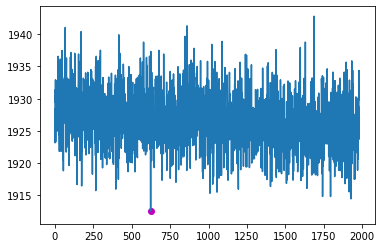

In [23]:
plt.plot(f)
plt.scatter(f_peak_idx,f_peak,color='m')
# plt.xlim([600,650])